In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Major Project/Data Clips')
featureFiles = os.listdir()
print('Current Directory :', os.getcwd(), '\nDirectory Contents:\n', featureFiles)

Current Directory : /content/drive/My Drive/Major Project/Data Clips 
Directory Contents:
 ['gu', 'kn', 'hi', 'en']


In [ ]:
import librosa
import numpy as np
import time
import matplotlib.pyplot as plt
from librosa.display import specshow
import numpy as np

In [ ]:
samplingRate = 22050

os.chdir('/content/drive/My Drive/Major Project/Data Clips')
languages = sorted(os.listdir())
print('Current Directory :', os.getcwd(), '\nDirectory Contents:', languages)
nLanguages = len(languages)

Current Directory : /content/drive/My Drive/Major Project/Data Clips 
Directory Contents: ['en', 'gu', 'hi', 'kn']


In [ ]:
maxFiles = 1000

for lanIndex in range(nLanguages):
  os.chdir('/content/drive/My Drive/Major Project/Data Clips')
  os.chdir(languages[lanIndex])

  audioFilenames = os.listdir()
  print('Current Directory :', os.getcwd(), '\nNumber of Files:', len(audioFilenames))

  startTime = time.time()
  audioFeatures = {}

  for fileIndex in range(maxFiles):
    audioFile = audioFilenames[fileIndex]
    audioSignal = librosa.load(audioFile)[0]
    mfcc = librosa.feature.mfcc(y=audioSignal,sr= samplingRate, n_mfcc = 13)
    delta = librosa.feature.delta(mfcc, order = 1)
    deltaDelta = librosa.feature.delta(mfcc, order = 2)
    audioFeatures[fileIndex] = np.concatenate((mfcc, delta, deltaDelta))
    #spec = librosa.feature.melspectrogram(y=audioSignal, sr=samplingRate,n_mels=40)
    #spec_mean = np.mean(spec,axis=0)
    #spec_std = np.std(spec,axis=0)

    #audioFeatures[fileIndex] = (spec-spec_mean)/spec_std
  os.chdir('/content/drive/My Drive/Major Project/Feature Files')
  np.save('{0}AudioFeatures.npy'.format(languages[lanIndex]), audioFeatures, allow_pickle = True)
  totalTime = time.time() - startTime
  print('Average Time Taken per File = ', totalTime/maxFiles, 's\nTotal Time Taken = ', totalTime, 's')

Current Directory : /content/drive/My Drive/Major Project/Data Clips/en 
Number of Files: 1006
Average Time Taken per File =  0.0680098819732666 s
Total Time Taken =  68.0098819732666 s
Current Directory : /content/drive/My Drive/Major Project/Data Clips/gu 
Number of Files: 1007
Average Time Taken per File =  0.052843310356140136 s
Total Time Taken =  52.84331035614014 s
Current Directory : /content/drive/My Drive/Major Project/Data Clips/hi 
Number of Files: 1006
Average Time Taken per File =  0.05629113268852234 s
Total Time Taken =  56.29113268852234 s
Current Directory : /content/drive/My Drive/Major Project/Data Clips/kn 
Number of Files: 1006
Average Time Taken per File =  0.05563473153114319 s
Total Time Taken =  55.63473153114319 s


In [ ]:
audioFeatures[0].shape

(40, 418)

In [ ]:
os.chdir('/content/drive/My Drive/Major Project/Feature Files')
maxDim = np.NINF

for lanIndex in range(nLanguages):
  audioFeatures = np.load('{0}AudioFeatures.npy'.format(languages[lanIndex]), allow_pickle = True)[()]
  for fileIndex in range(len(audioFeatures)):
    nFrames = audioFeatures[fileIndex].shape[1]
    if maxDim < audioFeatures[fileIndex].shape[1]:
      maxDim = nFrames

padInfoMatrix = []
outputLabelMatrix = []
featureMatrix = []

for lanIndex in range(nLanguages):
  lanPadInfoList = []
  audioFeatures = np.load('{0}AudioFeatures.npy'.format(languages[lanIndex]), allow_pickle = True)[()]
  outputLabelList = []
  featureList = []

  for fileIndex in range(len(audioFeatures)):
    audioFile = audioFeatures[fileIndex]
    lanPadInfoList.append(maxDim - audioFile.shape[1])
    audioFeatures[fileIndex] = np.pad(audioFile, ((0, 0), (0, maxDim - audioFile.shape[1])), 'constant', constant_values = 0)
    featureList.append(audioFeatures[fileIndex])
    outputLabelList.append(lanIndex + 1)

  padInfoMatrix.append(np.array(lanPadInfoList))
  outputLabelMatrix.append(np.array(outputLabelList))
  featureMatrix.append(np.array(featureList))

padInfoMatrix = np.array(padInfoMatrix)
outputLabelMatrix = np.array(outputLabelMatrix)
featureMatrix = np.array(featureMatrix)

np.save('outputLabels.npy', outputLabelMatrix, allow_pickle = True)
np.save('padInformationMatrix.npy', padInfoMatrix, allow_pickle = True)
np.save('featureMatrix.npy', featureMatrix, allow_pickle = True)

print(outputLabelMatrix.shape, featureMatrix.shape, padInfoMatrix.shape)

(4, 1000) (4, 1000, 39, 861) (4, 1000)


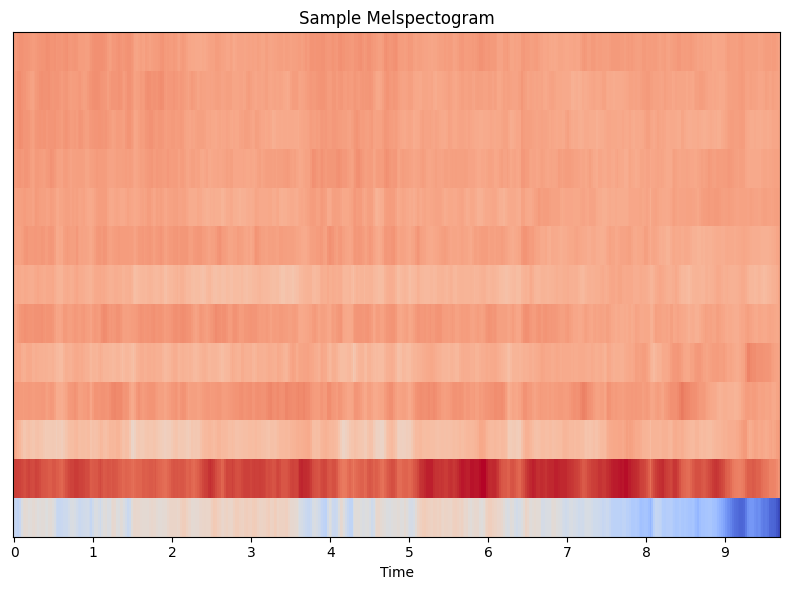

In [ ]:
os.chdir('/content/drive/My Drive/Major Project/Data Clips/kn')
audioFile = librosa.load(os.listdir()[0])[0]
samplingRate = 22050
mfcc = librosa.feature.mfcc(y=audioFile, sr=samplingRate, n_mfcc = 13)
delta = librosa.feature.delta(mfcc, order = 1)
deltaDelta = librosa.feature.delta(mfcc, order = 2)
#mel =librosa.feature.melspectrogram(y=audioSignal, sr=samplingRate)
plt.figure(figsize = (8, 6))
specshow(mfcc, x_axis = 'time')
plt.title("Sample Melspectogram")
plt.tight_layout()


In [ ]:
import numpy as np
import os

In [ ]:
os.chdir('/content/drive/My Drive/Major Project/Feature Files')
featureFiles = os.listdir()
print('Current Directory :', os.getcwd(), '\nDirectory Contents:\n', featureFiles)

Current Directory : /content/drive/My Drive/Major Project/Feature Files 
Directory Contents:
 ['enAudioFeatures.npy', 'guAudioFeatures.npy', 'hiAudioFeatures.npy', 'knAudioFeatures.npy', 'outputLabels.npy', 'padInformationMatrix.npy', 'featureMatrix.npy', 'trained_model.h5']


In [ ]:

featureMatrix = np.load('featureMatrix.npy', allow_pickle = True)
outputLabelMatrix = np.load('outputLabels.npy', allow_pickle = True)
padInfoMatrix = np.load('padInformationMatrix.npy', allow_pickle = True)

print(outputLabelMatrix.shape, featureMatrix.shape, padInfoMatrix.shape)

(4, 1000) (4, 1000, 39, 861) (4, 1000)


In [ ]:
nLanguages = 4
maxFiles = 1000
combinedFeatureList = []
combinedOutputLabelList = []

for lanIndex in range(nLanguages):
  for fileIndex in range(maxFiles):
    combinedFeatureList.append(featureMatrix[lanIndex][fileIndex].flatten())
    combinedOutputLabelList.append(outputLabelMatrix[lanIndex][fileIndex])

combinedFeatureList = np.array(combinedFeatureList)
combinedOutputLabelList = np.array(combinedOutputLabelList)

print(combinedFeatureList.shape, combinedOutputLabelList.shape)

(4000, 33579) (4000,)


In [ ]:
encodedOutputLabelList = np.zeros((combinedOutputLabelList.shape[0], combinedOutputLabelList.max() + 1))
encodedOutputLabelList[np.arange(combinedOutputLabelList.shape[0]), combinedOutputLabelList] = 1
print(encodedOutputLabelList.shape)


(4000, 5)


In [ ]:
from keras.models import Sequential
from keras import Input
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Activation,LSTM, Reshape
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split



In [ ]:

combinedFeatureList = []
combinedOutputLabelList = []

for lanIndex in range(nLanguages):
  for fileIndex in range(maxFiles):
    combinedFeatureList.append(featureMatrix[lanIndex][fileIndex])
    combinedOutputLabelList.append(outputLabelMatrix[lanIndex][fileIndex])

combinedFeatureList = np.array(combinedFeatureList)
combinedOutputLabelList = np.array(combinedOutputLabelList)

combinedFeatureList = combinedFeatureList.reshape(combinedFeatureList.shape[0], combinedFeatureList.shape[1], combinedFeatureList.shape[2], 1)

print(combinedFeatureList.shape, combinedOutputLabelList.shape)

(4000, 39, 861, 1) (4000,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(combinedFeatureList, encodedOutputLabelList, test_size=0.2, random_state = 33)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3200, 39, 861, 1) (800, 39, 861, 1) (3200, 5) (800, 5)


In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu',input_shape = combinedFeatureList.shape[1:]))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(256,kernel_size=(3,3), activation="relu"))
model.add(Reshape(target_shape=(103,256)))
model.add(LSTM(300))
model.add(Dense(encodedOutputLabelList.shape[1], activation = 'softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 859, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 429, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 427, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 213, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 211, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 105, 128)      0

In [ ]:
history = model.fit(x_train, y_train, epochs = 40, batch_size = 500, validation_data=(x_test, y_test))

Epoch 1/40
7/7 [==============================] - 175s 25s/step - loss: 1.5322 - accuracy: 0.2644 - val_loss: 1.4118 - val_accuracy: 0.2663
Epoch 2/40
7/7 [==============================] - 162s 23s/step - loss: 1.4187 - accuracy: 0.2537 - val_loss: 1.4116 - val_accuracy: 0.2500
Epoch 3/40
7/7 [==============================] - 163s 23s/step - loss: 1.4041 - accuracy: 0.2537 - val_loss: 1.3953 - val_accuracy: 0.2400
Epoch 4/40
7/7 [==============================] - 170s 24s/step - loss: 1.3932 - accuracy: 0.2550 - val_loss: 1.3815 - val_accuracy: 0.2675
Epoch 5/40
7/7 [==============================] - 170s 24s/step - loss: 1.3813 - accuracy: 0.2650 - val_loss: 1.3751 - val_accuracy: 0.2738
Epoch 6/40
7/7 [==============================] - 160s 23s/step - loss: 1.3789 - accuracy: 0.2856 - val_loss: 1.3762 - val_accuracy: 0.2500
Epoch 7/40
7/7 [==============================] - 172s 25s/step - loss: 1.3628 - accuracy: 0.2941 - val_loss: 1.3336 - val_accuracy: 0.3800
Epoch 8/40
7/7 [====

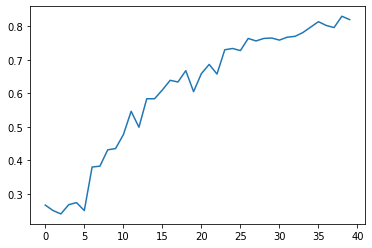

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [ ]:
model2 = Sequential()

model2.add(Conv2D(32, kernel_size=(3,3), activation='relu',input_shape = combinedFeatureList.shape[1:]))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Conv2D(256,kernel_size=(3,3), activation="relu"))
model2.add(Reshape(target_shape=(103,256)))
model2.add(LSTM(400))
model2.add(Dense(encodedOutputLabelList.shape[1], activation = 'softmax'))


model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 37, 859, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 18, 429, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 427, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 213, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 211, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 105, 128)      0

In [ ]:
history = model2.fit(x_train, y_train, epochs = 50, batch_size = 500, validation_data=(x_test, y_test))

Epoch 1/50
7/7 [==============================] - 298s 42s/step - loss: 1.5237 - accuracy: 0.2497 - val_loss: 1.4377 - val_accuracy: 0.2525
Epoch 2/50
7/7 [==============================] - 286s 40s/step - loss: 1.4034 - accuracy: 0.2547 - val_loss: 1.4002 - val_accuracy: 0.2575
Epoch 3/50
7/7 [==============================] - 284s 40s/step - loss: 1.3936 - accuracy: 0.2516 - val_loss: 1.3812 - val_accuracy: 0.2650
Epoch 4/50
7/7 [==============================] - 280s 40s/step - loss: 1.3844 - accuracy: 0.2709 - val_loss: 1.3862 - val_accuracy: 0.2750
Epoch 5/50
7/7 [==============================] - 282s 40s/step - loss: 1.3863 - accuracy: 0.2503 - val_loss: 1.3781 - val_accuracy: 0.2663
Epoch 6/50
7/7 [==============================] - 282s 40s/step - loss: 1.3772 - accuracy: 0.2869 - val_loss: 1.3598 - val_accuracy: 0.3475
Epoch 7/50
7/7 [==============================] - 283s 40s/step - loss: 1.3525 - accuracy: 0.3216 - val_loss: 1.3253 - val_accuracy: 0.3750
Epoch 8/50
7/7 [====

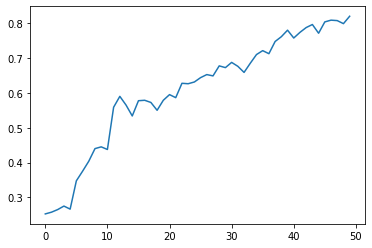

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [ ]:
model3 = Sequential()

model3.add(Conv2D(16, kernel_size=(3,3), activation='relu',input_shape = combinedFeatureList.shape[1:]))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))
model3.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Conv2D(128,kernel_size=(3,3), activation="relu"))
model3.add(Dropout(0.2))
model3.add(Reshape(target_shape=(103,128)))
model3.add(LSTM(500))
model3.add(Dense(encodedOutputLabelList.shape[1], activation = 'softmax'))


model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 37, 859, 16)       160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 18, 429, 16)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 427, 32)       4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 213, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 213, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 211, 64)        1

In [ ]:
history = model3.fit(x_train, y_train, epochs = 60, batch_size = 500, validation_data=(x_test, y_test))

Epoch 1/60
7/7 [==============================] - 177s 24s/step - loss: 1.5220 - accuracy: 0.2584 - val_loss: 1.3875 - val_accuracy: 0.2700
Epoch 2/60
7/7 [==============================] - 164s 23s/step - loss: 1.3950 - accuracy: 0.2622 - val_loss: 1.3750 - val_accuracy: 0.2925
Epoch 3/60
7/7 [==============================] - 154s 22s/step - loss: 1.3815 - accuracy: 0.2713 - val_loss: 1.3667 - val_accuracy: 0.3013
Epoch 4/60
7/7 [==============================] - 163s 23s/step - loss: 1.3714 - accuracy: 0.2794 - val_loss: 1.3452 - val_accuracy: 0.3313
Epoch 5/60
7/7 [==============================] - 161s 23s/step - loss: 1.3490 - accuracy: 0.3166 - val_loss: 1.2642 - val_accuracy: 0.4338
Epoch 6/60
7/7 [==============================] - 162s 23s/step - loss: 1.2592 - accuracy: 0.4322 - val_loss: 1.2036 - val_accuracy: 0.4450
Epoch 7/60
7/7 [==============================] - 163s 23s/step - loss: 1.2858 - accuracy: 0.4447 - val_loss: 1.1577 - val_accuracy: 0.5375
Epoch 8/60
7/7 [====

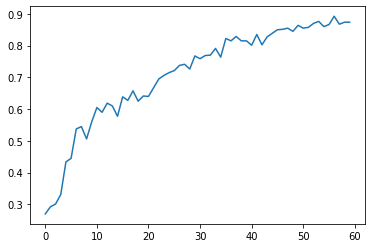

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [ ]:
history = model3.fit(x_train, y_train, epochs = 80, batch_size = 500, validation_data=(x_test, y_test))

Epoch 1/80
7/7 [==============================] - 194s 26s/step - loss: 1.5226 - accuracy: 0.2334 - val_loss: 1.4135 - val_accuracy: 0.2488
Epoch 2/80
7/7 [==============================] - 189s 27s/step - loss: 1.4075 - accuracy: 0.2572 - val_loss: 1.3808 - val_accuracy: 0.2763
Epoch 3/80
7/7 [==============================] - 182s 26s/step - loss: 1.3975 - accuracy: 0.2659 - val_loss: 1.3916 - val_accuracy: 0.2562
Epoch 4/80
7/7 [==============================] - 183s 26s/step - loss: 1.3884 - accuracy: 0.2572 - val_loss: 1.3731 - val_accuracy: 0.2937
Epoch 5/80
7/7 [==============================] - 181s 26s/step - loss: 1.3687 - accuracy: 0.3009 - val_loss: 1.3282 - val_accuracy: 0.3462
Epoch 6/80
7/7 [==============================] - 178s 26s/step - loss: 1.3213 - accuracy: 0.3694 - val_loss: 1.2627 - val_accuracy: 0.4650
Epoch 7/80
7/7 [==============================] - 183s 26s/step - loss: 1.2817 - accuracy: 0.3859 - val_loss: 1.2208 - val_accuracy: 0.4313
Epoch 8/80
7/7 [====

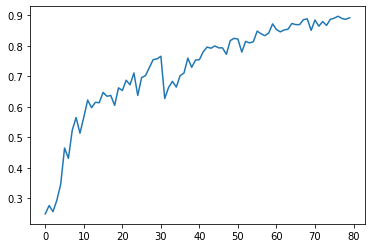

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [ ]:
model4 = Sequential()

model4.add(Conv2D(16, kernel_size=(3,3), activation='relu',input_shape = combinedFeatureList.shape[1:]))
model4.add(MaxPooling2D(pool_size = (2, 2)))
model4.add(Dropout(0.2))
model4.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model4.add(MaxPooling2D(pool_size = (2, 2)))
model4.add(Dropout(0.2))
model4.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model4.add(MaxPooling2D(pool_size = (2, 2)))
model4.add(Conv2D(128,kernel_size=(3,3), activation="relu"))
model4.add(Dropout(0.2))
model4.add(Reshape(target_shape=(103,128)))
model4.add(LSTM(500))
model4.add(Reshape(target_shape=(500,1)))
model4.add(LSTM(300))
model4.add(Dense(encodedOutputLabelList.shape[1], activation = 'softmax'))


model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model4.summary()

ValueError: ignored

In [ ]:
model4 = Sequential()

model4.add(Conv2D(16, kernel_size=(3,3), activation='relu',input_shape = combinedFeatureList.shape[1:]))
model4.add(MaxPooling2D(pool_size = (2, 2)))
model4.add(Dropout(0.2))
model4.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model4.add(MaxPooling2D(pool_size = (2, 2)))
model4.add(Dropout(0.2))
model4.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model4.add(MaxPooling2D(pool_size = (2, 2)))
model4.add(Conv2D(128,kernel_size=(3,3), activation="relu"))
model4.add(Dropout(0.2))
model4.add(Reshape(target_shape=(103,128)))
model4.add(LSTM(500))
model4.add(Reshape(target_shape=(500,1)))
model4.add(LSTM(300))
model4.add(Dense(encodedOutputLabelList.shape[1], activation = 'softmax'))


model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model4.summary()

ValueError: ignored

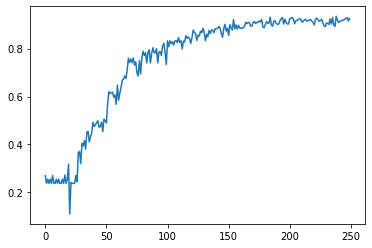

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [ ]:
model4 = Sequential()

model4.add(Conv2D(16, kernel_size=(3,3), activation='relu',input_shape = combinedFeatureList.shape[1:]))
model4.add(MaxPooling2D(pool_size = (2, 2)))
model4.add(Dropout(0.2))
model4.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
model4.add(MaxPooling2D(pool_size = (2, 2)))
model4.add(Dropout(0.2))
model4.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model4.add(MaxPooling2D(pool_size = (2, 2)))
model4.add(Conv2D(32,kernel_size=(3,3), activation="relu"))
model4.add(Dropout(0.2))
model4.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.2))
model4.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.2))

model4.add(Reshape(target_shape=(24,64)))
model4.add(LSTM(units=500,return_sequences=True))

model4.add(LSTM(units=300))
model4.add(Dense(encodedOutputLabelList.shape[1], activation = 'softmax'))


model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 859, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 429, 16)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 429, 16)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 427, 16)       2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 213, 16)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 213, 16)       0

In [ ]:
history = model4.fit(x_train, y_train, epochs = 80, batch_size = 500, validation_data=(x_test, y_test))

Epoch 1/80
7/7 [==============================] - 37s 2s/step - loss: 1.4570 - accuracy: 0.3225 - val_loss: 1.3438 - val_accuracy: 0.3988
Epoch 2/80
7/7 [==============================] - 7s 1s/step - loss: 1.3061 - accuracy: 0.3869 - val_loss: 1.2333 - val_accuracy: 0.4025
Epoch 3/80
7/7 [==============================] - 7s 1s/step - loss: 1.2091 - accuracy: 0.4519 - val_loss: 1.1828 - val_accuracy: 0.5263
Epoch 4/80
7/7 [==============================] - 7s 983ms/step - loss: 1.1184 - accuracy: 0.5572 - val_loss: 1.1064 - val_accuracy: 0.5550
Epoch 5/80
7/7 [==============================] - 7s 1s/step - loss: 1.0600 - accuracy: 0.5603 - val_loss: 1.0635 - val_accuracy: 0.5838
Epoch 6/80
7/7 [==============================] - 7s 1s/step - loss: 1.0064 - accuracy: 0.5922 - val_loss: 1.0952 - val_accuracy: 0.5487
Epoch 7/80
7/7 [==============================] - 7s 1s/step - loss: 1.0084 - accuracy: 0.5875 - val_loss: 1.0667 - val_accuracy: 0.5863
Epoch 8/80
7/7 [=====================

In [ ]:
model5 = Sequential()

model5.add(Conv2D(32, kernel_size=(3,3), activation='relu',input_shape = combinedFeatureList.shape[1:]))
model5.add(MaxPooling2D(pool_size = (2, 2)))
model5.add(Dropout(0.2))
model5.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model5.add(MaxPooling2D(pool_size = (2, 2)))
model5.add(Dropout(0.2))
model5.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model5.add(MaxPooling2D(pool_size = (2, 2)))
model5.add(Conv2D(256,kernel_size=(3,3), activation="relu"))

model5.add(Dropout(0.2))

model5.add(Reshape(target_shape=(103,256)))
#model5.add(LSTM(units=500,return_sequences=True))

model5.add(LSTM(units=500))
model5.add(Dense(encodedOutputLabelList.shape[1], activation = 'softmax'))


model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 38, 859, 32)       320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 19, 429, 32)      0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 19, 429, 32)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 17, 427, 64)       18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 213, 64)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 8, 213, 64)       

In [ ]:
history = model5.fit(x_train, y_train, epochs = 150, batch_size = 500, validation_data=(x_test, y_test))

Epoch 1/150
7/7 [==============================] - 19s 2s/step - loss: 1.5065 - accuracy: 0.2478 - val_loss: 1.4483 - val_accuracy: 0.2375
Epoch 2/150
7/7 [==============================] - 7s 952ms/step - loss: 1.4193 - accuracy: 0.2463 - val_loss: 1.3987 - val_accuracy: 0.2475
Epoch 3/150
7/7 [==============================] - 7s 957ms/step - loss: 1.3970 - accuracy: 0.2469 - val_loss: 1.3957 - val_accuracy: 0.2375
Epoch 4/150
7/7 [==============================] - 6s 921ms/step - loss: 1.3881 - accuracy: 0.2606 - val_loss: 1.3829 - val_accuracy: 0.2738
Epoch 5/150
7/7 [==============================] - 7s 962ms/step - loss: 1.3854 - accuracy: 0.2597 - val_loss: 1.3776 - val_accuracy: 0.2738
Epoch 6/150
7/7 [==============================] - 7s 957ms/step - loss: 1.3838 - accuracy: 0.2569 - val_loss: 1.3731 - val_accuracy: 0.2587
Epoch 7/150
7/7 [==============================] - 6s 894ms/step - loss: 1.3748 - accuracy: 0.2631 - val_loss: 1.3535 - val_accuracy: 0.3162
Epoch 8/150
7/7

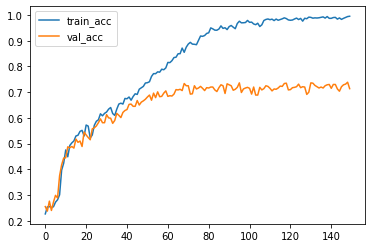

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["train_acc","val_acc"])

In [ ]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3,3), activation='relu',input_shape = combinedFeatureList.shape[1:]))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(128,kernel_size=(3,3), activation="relu"))
model.add(Reshape(target_shape=(103,128)))
model.add(LSTM(500))
model.add(Dense(encodedOutputLabelList.shape[1], activation = 'softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 37, 859, 16)       160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 18, 429, 16)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 427, 32)       4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 213, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 6, 211, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 105, 64)      

In [ ]:
history = model.fit(x_train, y_train, epochs = 80, batch_size = 500, validation_data=(x_test, y_test))

Epoch 1/80
7/7 [==============================] - 24s 1s/step - loss: 1.5388 - accuracy: 0.2500 - val_loss: 1.4388 - val_accuracy: 0.2625
Epoch 2/80
7/7 [==============================] - 2s 337ms/step - loss: 1.4036 - accuracy: 0.2637 - val_loss: 1.4152 - val_accuracy: 0.2675
Epoch 3/80
7/7 [==============================] - 2s 319ms/step - loss: 1.3898 - accuracy: 0.2609 - val_loss: 1.3714 - val_accuracy: 0.2713
Epoch 4/80
7/7 [==============================] - 2s 339ms/step - loss: 1.3788 - accuracy: 0.2744 - val_loss: 1.3717 - val_accuracy: 0.2837
Epoch 5/80
7/7 [==============================] - 2s 353ms/step - loss: 1.3705 - accuracy: 0.2719 - val_loss: 1.3397 - val_accuracy: 0.3237
Epoch 6/80
7/7 [==============================] - 2s 332ms/step - loss: 1.3453 - accuracy: 0.3509 - val_loss: 1.2800 - val_accuracy: 0.4425
Epoch 7/80
7/7 [==============================] - 2s 320ms/step - loss: 1.2751 - accuracy: 0.4141 - val_loss: 1.1925 - val_accuracy: 0.4387
Epoch 8/80
7/7 [======

In [ ]:
model.save("trained_model.h5")

In [ ]:
from keras.models import Model
from keras.models import load_model
import os
os.chdir('/content/drive/My Drive/Major Project/Feature Files')
model = load_model("trained_model.h5")
embedding_model = Model(inputs=model.input, outputs=model.layers[-2].output)
speech_embeddings = embedding_model.predict(x_test)
np.shape(speech_embeddings)

25/25 [==============================] - 10s 8ms/step


(800, 500)

In [ ]:
!pip install fastcluster

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.7/193.7 kB 8.4 MB/s eta 0:00:00


In [ ]:
import os
import matplotlib.pyplot as plt
import fastcluster
import scipy.cluster.hierarchy as sch
import argparse
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
import numpy as np
import scipy as sp
from sklearn.cluster import SpectralClustering
from sklearn.model_selection import RandomizedSearchCV
from pathlib import Path
from pdb import set_trace as bp
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import squareform
from scipy.special import softmax
from scipy.linalg import eigh


def twoGMMcalib_lin(s, niters=10):
    """
    Train two-Gaussian GMM with shared variance for calibration of scores 's'
    Returns threshold for original scores 's' that "separates" the two gaussians
    and array of linearly callibrated log odds ratio scores.
    """
    weights = np.array([0.5, 0.5])
    means = np.mean(s) + np.std(s) * np.array([-1, 1])
    var = np.var(s)
    threshold = np.inf
    for _ in range(niters):
        lls = np.log(weights) - 0.5 * np.log(var) - 0.5 * (s[:, np.newaxis] - means)**2 / var
        gammas = softmax(lls, axis=1)
        cnts = np.sum(gammas, axis=0)
        weights = cnts / cnts.sum()
        means = s.dot(gammas) / cnts
        var = ((s**2).dot(gammas) / cnts - means**2).dot(weights)
        threshold = -0.5 * (np.log(weights**2 / var) - means**2 / var).dot([1, -1]) / (means/var).dot([1, -1])
    return threshold, lls[:, means.argmax()] - lls[:, means.argmin()]


def cos_similarity(x):
    """Compute cosine similarity matrix in CPU & memory sensitive way
    Args:
        x (np.ndarray): embeddings, 2D array, embeddings are in rows
    Returns:
        np.ndarray: cosine similarity matrix
    """

    assert x.ndim == 2, f'x has {x.ndim} dimensions, it must be matrix'
    x = x / (np.sqrt(np.sum(np.square(x), axis=1, keepdims=True)) + 1.0e-32)
    # return x.dot(x.T)
    assert np.allclose(np.ones_like(x[:, 0]), np.sum(np.square(x), axis=1))
    max_n_elm = 200000000
    step = max(max_n_elm // (x.shape[0] * x.shape[0]), 1)
    retval = np.zeros(shape=(x.shape[0], x.shape[0]), dtype=np.float64)
    x0 = np.expand_dims(x, 0)
    x1 = np.expand_dims(x, 1)
    for i in range(0, x.shape[1], step):
        product = x0[:, :, i:i+step] * x1[:, :, i:i+step]
        retval += np.sum(product, axis=2, keepdims=False)
    assert np.all(retval >= -1.0001), retval
    assert np.all(retval <= 1.0001), retval
    return retval


def AHC(x):
	scr_mx = cos_similarity(x)
	thr, _ = twoGMMcalib_lin(scr_mx.ravel())
	scr_mx = squareform(-scr_mx, checks=False)
	lin_mat = fastcluster.linkage(scr_mx, method='average', preserve_input='False')
	del scr_mx
	adjust = abs(lin_mat[:, 2].min())
	lin_mat[:, 2] += adjust
	labels1st = fcluster(lin_mat, -(thr - 0.015) + adjust,criterion='distance') - 1
	return labels1st


def labels_to_rttm(segments, labels, rttm_file, rttm_channel=1):
    labels = labels+1
    reco2segs = {}


    with open(segments, 'r') as segments_file:
        lines = segments_file.readlines()
    for line, label in zip(lines, labels):
        seg, reco, start, end = line.strip().split()
        start, end = float(start), float(end)

        try:
            if reco in reco2segs:
                reco2segs[reco] = "{} {},{},{}".format(reco2segs[reco],start,end,label)  #reco2segs[reco] + " " + start + "," + end + "," + label
            else:
                reco2segs[reco] = "{} {},{},{}".format(reco,start,end,label) #reco + " " + start + "," + end + "," + label
        except KeyError:
            raise RuntimeError("Missing label for segment {0}".format(seg))

    contiguous_segs = []
    for reco in sorted(reco2segs):
        segs = reco2segs[reco].strip().split()
        new_segs = ""
        for i in range(1, len(segs)-1):
            start, end, label = segs[i].split(',')
            next_start, next_end, next_label = segs[i+1].split(',')
            if float(end) > float(next_start):
                done = False
                avg = str((float(next_start) + float(end)) / 2.0)
                segs[i+1] = ','.join([avg, next_end, next_label])
                new_segs += " {},{},{}".format(start,avg,label)   #" " + start + "," + avg + "," + label
            else:
                new_segs += " {},{},{}".format(start,end,label)   #" " + start + "," + end + "," + label
        start, end, label = segs[-1].split(',')
        new_segs += " {},{},{}".format(start,end,label)  #" " + start + "," + end + "," + label
        contiguous_segs.append(reco + new_segs)

    merged_segs = []
    for reco_line in contiguous_segs:
        segs = reco_line.strip().split()
        reco = segs[0]
        new_segs = ""
        for i in range(1, len(segs)-1):
            start, end, label = segs[i].split(',')
            next_start, next_end, next_label = segs[i+1].split(',')
            if float(end) == float(next_start) and label == next_label:
                segs[i+1] = ','.join([start, next_end, next_label])
            else:
                new_segs += " {},{},{}".format(start,end,label)  #" " + start + "," + end + "," + label
        start, end, label = segs[-1].split(',')
        new_segs += " {},{},{}".format(start,end,label)  #" " + start + "," + end + "," + label
        merged_segs.append(reco + new_segs)

    with open(rttm_file, 'w') as rttm_writer:
        for reco_line in merged_segs:
            segs = reco_line.strip().split()
            reco = segs[0]
            for i in range(1, len(segs)):
                start, end, label = segs[i].strip().split(',')
                print("LANGUAGE {0} {1} {2:7.3f} {3:7.3f} <NA> <NA> L{4} <NA> <NA>".format(
                    reco, rttm_channel, float(start), float(end)-float(start), label), file=rttm_writer)


def get_args():
    parser = argparse.ArgumentParser()
    parser.add_argument("embeddings_segments_list") # emb_segments.list or llk_segments.list
    parser.add_argument("rttm_path") # exps/exp1/ecapa_tdnn_voxlingua_speechbrain_language_embeddings/rttm_outputs
    parser.add_argument('mode', type=str, help='AHC,kmeans,spectral_clustering')
    args = parser.parse_args()
    embeddings_segments = np.genfromtxt(args.embeddings_segments_list, dtype=str)
    return embeddings_segments, args.rttm_path, args.mode

def out_filename(emb_file, rttm_path, clustering_hparams=""):
    rec_basename = os.path.splitext(os.path.basename(emb_file))[0]
    segment_basename = os.path.basename(os.path.dirname(emb_file))
    # bp()
    out_file = os.path.join(rttm_path, segment_basename, f"{clustering_hparams}", f"{rec_basename}.rttm")
    if not os.path.exists(os.path.dirname(out_file)):
        os.makedirs(os.path.dirname(out_file))
    return out_file


def main():
    embeddings_segments, rttm_path, mode = speech_embeddings,"/content/","AHC"

    clustering_algo_dict = {"AHC": AHC}

    cluster = clustering_algo_dict[mode]



    #for emb in range(0,len(embeddings_segments)):
      #data = np.reshape(embeddings_segments[emb],(1,len(embeddings_segments[emb])))
      #print(data.shape)
    data = embeddings_segments
    labels=cluster(data)
        #out_file = out_filename(emb_file, rttm_path, mode)
    #labels_to_rttm(segments, labels, out_file)
    #print(f"\n\n\n\n Clustering ({mode}) done for {emb_file}, saved to {out_file}.\n\n\n\n")
    print(labels)
    return labels


x=main()


[ 0 12 12  2  0 12  2  0 12  9 12  0  2  0  9 12  2  2 12  2  2  9  0  9
  9  9  2  0  9  0  9  2  9  2 12 12  2  2  2  9 12  9 12  9  9  0  2 12
  9  2  2  2  2  2 12  9 12  2  9  0 12  0  0  9  0 12 12  2 12  9 12 12
  9  0 12  9  2  2  9  0  9  2  9 12  0  2  4  0  2 10  0  9 12  0  0  0
  2  9  0  2  9 12 10  2  0  9  9  9  0  2  9 12  2  2 12  2  0  2  9  9
  2  9 12  2 12  0  2  0 12 12  0  9  9 12 12 12  9  9  0  9  2 12  2  0
 12  0  9 12  9  0 12 12  9  5  9  9 12 12  2 12 11  0  2  9  2  9  9  9
  9  9  0 12  2  9  9  0 10  2 12  0  0  0  2  2 12  9 12 10  2 12  7  9
  0  0  0  2 12 10  9  7  9  0  0  9  9  2 12  0  0  2  9  0  9  9  9  9
  0  2  9 10  2  9  9 12  0 12  9  0  0  0  0  2  0 12 12  2  9  9  0  2
  9  0  2  2  9  9  9  9  2  0  2  9 10 10 12 12  0  2  9  9  9  2 12  9
 12 10  2  0 12 12  9 11  2 12  2  2  9  4  0  9  9 12  2  9  9  0  2  0
  0  9 12  0  2  0  0  9  0  4 12  9  9  0  9  2 12  2 12  4 12  0  0 12
  0  0  2  9 12 10  9  2  9  2  2 12 12  9  9 12 10

/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:122: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
/usr/local/lib/python3.9/dist-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


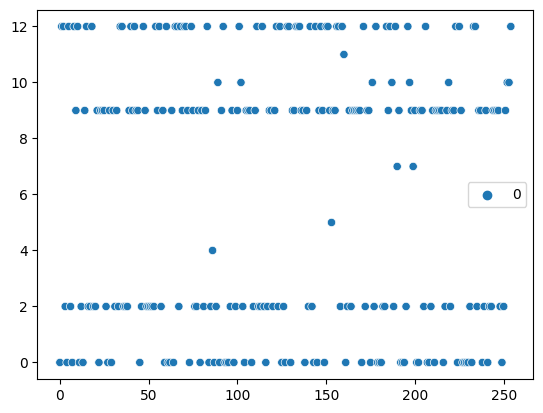

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
arr = np.zeros((800,1))
for i in range(0,len(x)):
  for j in range(0,1):
    arr[i]=x[i]
sns.scatterplot(arr[0:255],cmap="coolwarm")
plt.show()

In [ ]:
len(x)

800